## Estadística Aplicada

Nombre: Barbara Govea Serna

Matrícula: 1902869

Grupo: 042

Fecha: 18-Oct-2023

In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
%matplotlib inline

In [70]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from pmdarima import auto_arima

plt.rcParams['figure.figsize']=(10,6)

In [71]:
igae_deses=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [72]:
igae_deses['meses']=pd.to_datetime(igae_deses['meses'],format='%Y/%m')
igae_deses = igae_deses.set_index('meses')
igae_deses = igae_deses.asfreq('MS')

In [73]:
# ignoramos los warnings 
import warnings
warnings.filterwarnings('ignore')

In [74]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [75]:
# Esta funcion hace el proceso automatico q hicimos en la sesion 14
# este es sin componente estacional
pm.auto_arima(igae_deses,
              start_p= 1,
              start_q = 1,
              max_p=7, 
              max_q=7,
              ic='aic',
              seasonal=False)
# Nos sugiere que sea una arima 1,1,2

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [76]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [77]:
pasajeros = pasajeros.asfreq('MS')
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


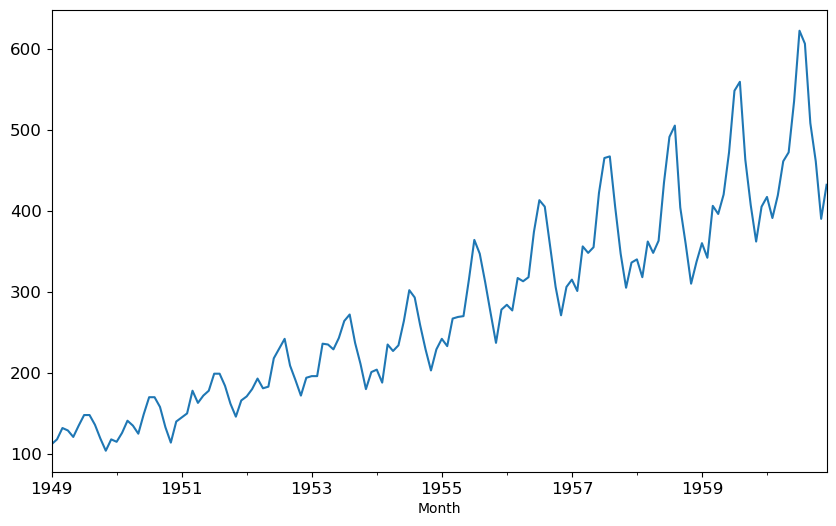

In [78]:
pasajeros['Thousands of Passengers'].plot();

In [79]:
# Comprobar si la serie es estacionaria por medio de DFA
prueba_DFA = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_DFA[1]
pvalue

0.9918802434376411

### Como $pvalue > alpha$, no se rechaza la hipotesis nula por lo que la serie Thousands of passengers es no estacionaria 

In [80]:
## Calcular las primeras diferencias
pasajeros['passengers_dif'] = pasajeros['Thousands of Passengers'].diff()
pasajeros

,Thousands of Passengers,passengers_dif
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


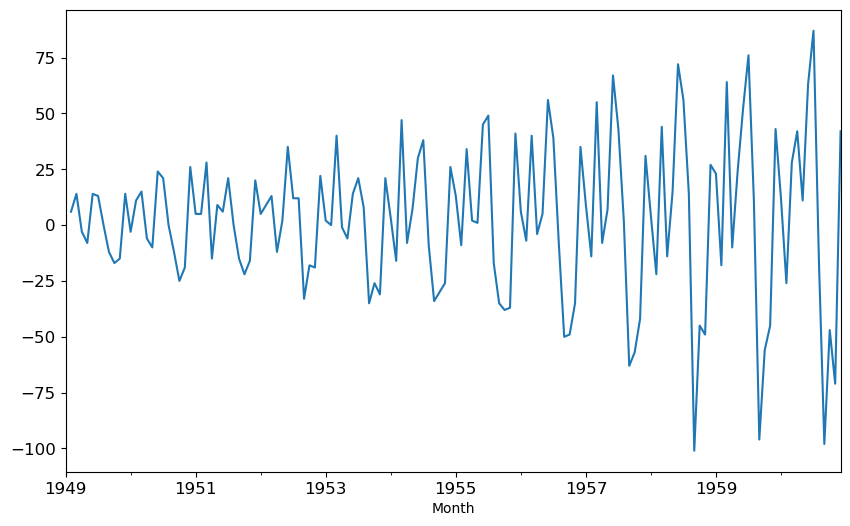

In [81]:
pasajeros['passengers_dif'].plot();

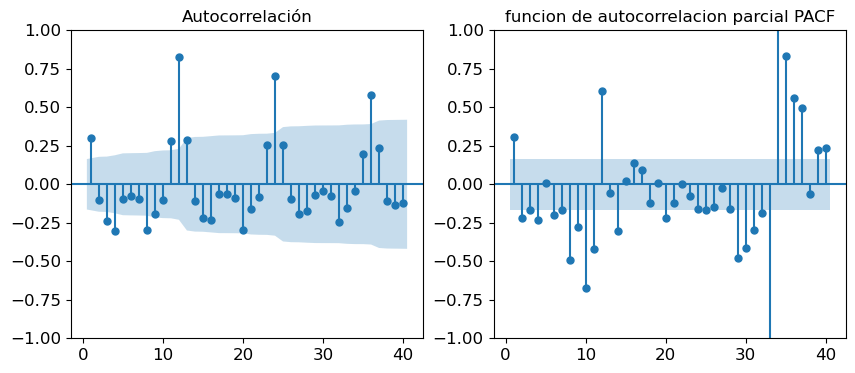

In [82]:
## Graficas de autocorrelación 
ig, ax = plt.subplots(1,2,figsize = (10,4))

## 1 lags:resagos
plot_acf(pasajeros['passengers_dif'].dropna(),zero=False,lags=40,ax=ax[0],title='Autocorrelación')
ax[0].set_ylim(-1,1)

## 2
plot_pacf(pasajeros['passengers_dif'].dropna(),zero=False,lags=40,ax=ax[1],title='funcion de autocorrelacion parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

# Esta es una serie con componente estacional

In [83]:
pm.auto_arima(pasajeros['Thousands of Passengers'],
              # ARIMA NORMAL
              start_p=1,
              star_q=1,
              m=12,
              max_p=7,
              max_q=7,
              # ESTACIONAL
              seasonal=True,
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12)
# Este es un modelo SARIMA de la forma (p,I,q)(P,D,Q) ->  (0,1,1)(2,1,0) # El 12 es la frecuencia

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [84]:
# Estimar modelo
model = ARIMA(pasajeros['Thousands of Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Wed, 18 Oct 2023   AIC                           1019.178
Time:                                   16:24:54   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [85]:
pasajeros['pronostico'] = results.predict()
pasajeros['pronostico'][0] = pasajeros['Thousands of Passengers'][0]
pasajeros


,Thousands of Passengers,passengers_dif,pronostico
Month,,,
1949-01-01,112,NaN,112.000000
1949-02-01,118,6.0,111.997178
1949-03-01,132,14.0,117.999698
1949-04-01,129,-3.0,131.999295
1949-05-01,121,-8.0,129.000151
...,...,...,...
1960-08-01,606,-16.0,630.591419
1960-09-01,508,-98.0,511.058149
1960-10-01,461,-47.0,456.766670


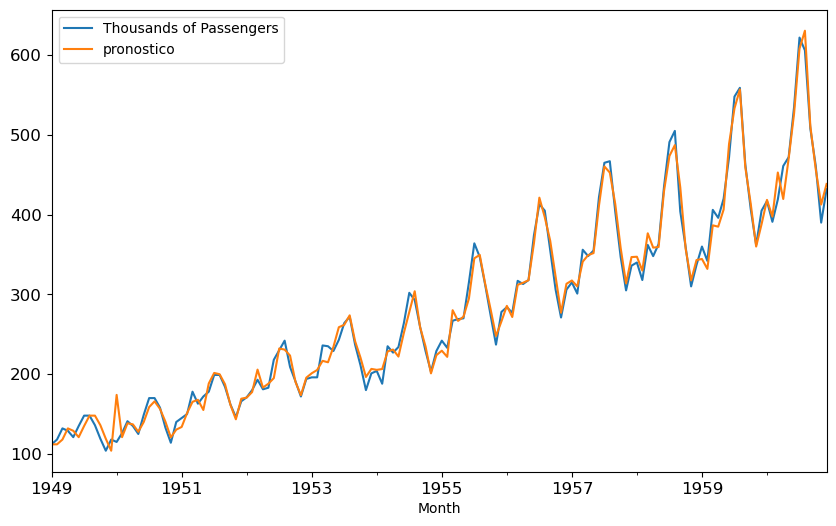

In [86]:
# MODELO ARIMA ESTACIONAL
pasajeros['Thousands of Passengers'].plot()
pasajeros['pronostico'].plot()
plt.legend();

In [87]:
pasajeros.tail(1)

,Thousands of Passengers,passengers_dif,pronostico
Month,,,
1960-12-01,432,42.0,438.478199


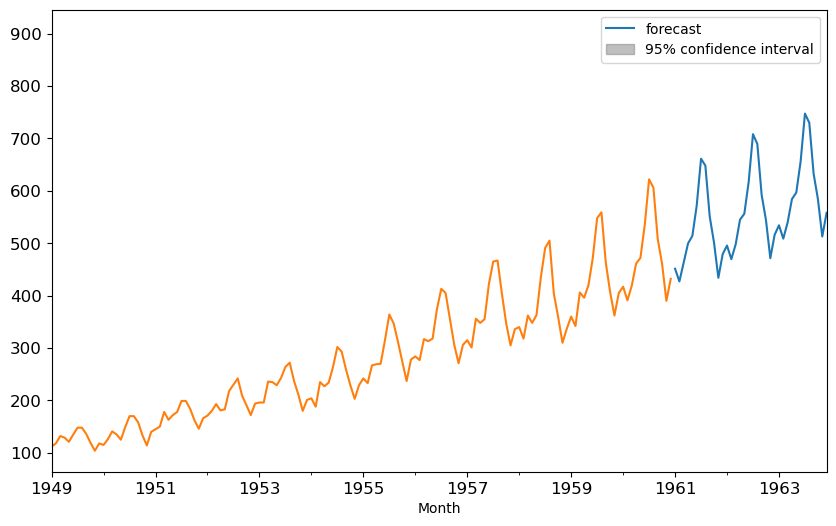

In [88]:
plot_predict(results,start='1961-01-01',end='1963-12-01')
pasajeros['Thousands of Passengers'].plot();

In [90]:
results.predict(start='1961-01-01',end='1963-12-01')

1961-01-01    451.347077
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310509
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532194
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738522
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64